# Text Classification - Cumulative Lab

## Introduction

In this cumulative lab, we'll use everything we've learned so far to build a model that can classify a text document as one of many possible classes!

## Objectives

You will be able to:

- Practice cleaning and exploring a text dataset with NLTK and base Python
- Practice using scikit-learn vectorizers for text preprocessing
- Tune a modeling process through exploration and model evaluation
- Observe some techniques for feature engineering
- Interpret the result of a final ML model that classifies text data

## Your Task: Complete an End-to-End ML Process with the Newsgroups Dataset

<a title="Bundesarchiv, B 145 Bild-F077948-0006 / Engelbert Reineke / CC-BY-SA 3.0, CC BY-SA 3.0 DE &lt;https://creativecommons.org/licenses/by-sa/3.0/de/deed.en&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bundesarchiv_B_145_Bild-F077948-0006,_Jugend-Computerschule_mit_IBM-PC.jpg"><img width="512" alt="Bundesarchiv B 145 Bild-F077948-0006, Jugend-Computerschule mit IBM-PC" src="https://upload.wikimedia.org/wikipedia/commons/e/e9/Bundesarchiv_B_145_Bild-F077948-0006%2C_Jugend-Computerschule_mit_IBM-PC.jpg"></a>

### Business Understanding

The ***Newsgroups Dataset*** is a collection of [newsgroup](https://en.wikipedia.org/wiki/Usenet_newsgroup) posts originally collected around 1995. While the backend code implementation is fairly different, you can think of them as like the Reddit posts of 1995, where a "category" in this dataset is like a subreddit.

The task is to try to identify the category where a post was published, based on the text content of the post.

### Data Understanding

#### Data Source

Part of what you are practicing here is using the `sklearn.datasets` submodule, which you have seen before (e.g. the Iris Dataset, the Wine Dataset). You can see a full list of available dataset loaders [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In this case we will be using the `fetch_20newsgroups` function ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)). An important thing to note is that because this is text data, scikit-learn actually downloads a set of documents to the computer you are using to complete this lab, rather than just loading data into memory in Python.

#### Features

Prior to preprocessing, every row in the dataset only contains one feature: a string containing the full text of the newsgroup post. We will perform preprocessing to create additional features.

#### Target

As you might have guessed based on the function name, there are 20 categories in the full dataset. Here is a list of all the possible classes:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/classes.png'>

This full dataset is quite large. To save us from extremely long runtimes, we'll work with only a subset of the classes. For this lab, we'll work with the following five:

* `'comp.windows.x'`
* `'rec.sport.hockey'`
* `'misc.forsale'`
* `'sci.crypt'`
* `'talk.politics.misc'`

### Requirements

#### 1. Load the Data

Use pandas and `sklearn.datasets` to load the train and test data into appropriate data structures. Then get a sense of what is in this dataset by visually inspecting some samples.

#### 2. Perform Data Cleaning and Exploratory Data Analysis with `nltk`

Standardize the case of the data and use a tokenizer to convert the full posts into lists of individual words. Then compare the raw word frequency distributions of each category.

#### 3. Build and Evaluate a Baseline Model with `TfidfVectorizer` and `MultinomialNB`

Ultimately all data must be in numeric form in order to be able to fit a scikit-learn model. So we'll use a tool from `sklearn.feature_extraction.text` to convert all data into a vectorized format.

Initially we'll keep all of the default parameters for both the vectorizer and the model, in order to develop a baseline score.

#### 4. Iteratively Perform and Evaluate Preprocessing and Feature Engineering Techniques

Here you will investigate three techniques, to determine whether they should be part of our final modeling process:

1. Removing stopwords
2. Using custom tokens
3. Domain-specific feature engineering
4. Increasing `max_features`

#### 5. Evaluate a Final Model on the Test Set

Once you have chosen a final modeling process, fit it on the full training data and evaluate it on the test data. 

## 1. Load the Data

In the cell below, create the variables `newsgroups_train` and `newsgroups_test` by calling the `fetch_20newsgroups` function twice.

For the train set, specify `subset="train"`. For the test set, specify `subset="test"`.

Additionally, pass in `remove=('headers', 'footers', 'quotes')` in both function calls, in order to automatically remove some metadata that can lead to overfitting.

Recall that we are loading only five categories, out of the full 20. So, pass in `categories=categories` both times.

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'comp.windows.x',
    'rec.sport.hockey',
    'misc.forsale',
    'sci.crypt',
    'talk.politics.misc'
]

newsgroups_train = fetch_20newsgroups(
    subset="train",
    remove=('headers', 'footers', 'quotes'),
    categories=categories
)

newsgroups_test = fetch_20newsgroups(
    subset="test",
    remove=('headers', 'footers', 'quotes'),
    categories=categories
)

Each of the returned objects is a dictionary-like `Bunch` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)):

In [2]:
# Run this cell without changes
type(newsgroups_train)

sklearn.utils._bunch.Bunch

The important thing to know is that the `.data` attribute will extract the feature values, and the `.target` attribute will extract the target values. So, for example, the train features (`X_train`) are located in `newsgroups_train.data`, whereas the train targets (`y_train`) are located in `newsgroups_train.target`.

In the cell below, create `X_train`, `X_test`, `y_train`, `y_test` based on `newsgroups_train` and `newsgroups_test`.

In [3]:
import pandas as pd
pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)

# Extract values from Bunch objects
X_train = pd.DataFrame(newsgroups_train.data, columns=["text"])
X_test = pd.DataFrame(newsgroups_test.data, columns=["text"])
y_train = pd.Series(newsgroups_train.target, name="category")
y_test = pd.Series(newsgroups_test.target, name="category")

Double-check that your variables have the correct shape below:

In [4]:
# Run this cell without changes

# X_train and X_test both have 1 column (text)
assert X_train.shape[1] == X_test.shape[1] and X_train.shape[1] == 1

# y_train and y_test are 1-dimensional (target value only)
assert len(y_train.shape) == len(y_test.shape) and len(y_train.shape) == 1

# X_train and y_train have the same number of rows
assert X_train.shape[0] == y_train.shape[0] and X_train.shape[0] == 2838

# X_test and y_test have the same number of rows
assert X_test.shape[0] == y_test.shape[0] and X_test.shape[0] == 1890

And now let's look at some basic attributes of the dataset.

#### Distribution of Target

We know that there are five categories represented. How many are there of each?

In [5]:
# Run this cell without changes

train_target_counts = pd.DataFrame(y_train.value_counts())
train_target_counts["label"] = [newsgroups_train.target_names[val] for val in train_target_counts.index]
train_target_counts.columns = ["count", "target name"]
train_target_counts.index.name = "target value"
train_target_counts

,count,target name
target value,,
2,600,rec.sport.hockey
3,595,sci.crypt
0,593,comp.windows.x
1,585,misc.forsale
4,465,talk.politics.misc


So, for example, the category "comp.windows.x" has the label of `0` in our dataset, and there are 593 text samples in that category within our training data.

We also note that our target distribution looks reasonably balanced. Now let's look at the features.

#### Visually Inspecting Features

Run the cell below to view some examples of the features:

In [6]:
# Run this cell without changes

# Sample 5 records and display full text of each
train_sample = X_train.sample(5, random_state=22)
train_sample["label"] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

,text,label
1300,"Ncd has an excellent document titled ""Host Loading Considerations in the X environment"". I received my copy by emailing support@ncd.com. This may help out.",0
1758,"You don't have to. *It* believes in YOU. Well, looking at our new government pals, I'm inclined to agree. I don't much believe in our money, either. :) Oh, ho HO! If only you knew! :) Yup, I'm DEFINITELY checking out foreign currency, thanks to to this newsgroup. It sure doesn't take much thinking to realize what direction the U.S. is headed.",4
2558,"Miscellaneous comics for sale. I really would like to get rid of these for lack of space. Buyer pays shipping, and all offers considered. OH, and the first purchase over $20 in any of my posts gets a free Maxx #1/2 coupon, or a trashed copy of Amazing spidey #300. Here goes... Deathlok #1 $3.00 2-17 $1.75 each Annual #1 2.50 Special #1 2.00 Sleepwalker 1,2,6,8,9,13 7.00 (set) or 1.25 each Next Men #1 $3.00 Ray #1 1.00 Deathstroke 5,6 1.75 each Darkhawk 13 1.25 New warrior's 18 1.00 Fantasti Four 358 2.50 Moon Knight 35,36 1.75 each Hulk 386-388 1.50 each Punisher W.Z. 1 2.50 Cage 1 1.50 X-force 1 2.00 Silver Sable 1 2.00 X-calibur 26,27,48,49 1.50 each Hearts of Darkness 5.00 Infinity Guantlet 1-4 2.50 each Batman v. Pred. 1,3 2.00 each "" "" "" (deluxe) 1 5.00 Guardians of the Galaxy 1 3.00 Spider-man 2099 1-3 5.00 (set) Spec. spider-man 189 3.00 (special hologram) Let me know if you'd like to buy anything. My address is U38134@uicvm.uic.edu",1
2267,"My vote goes to Andy Moog 1st, Belfour 2nd, Vanbiesbrouck 3rd The Bruin's are hot at just the right time !!!!! rich beskosty",2
1043,"Yes, ""Clipper"" is a trademark of Intergraph. Its the RISC chip used in some of thier workstations. I wonder what Intergraph is going to do to this infringement on thier name sake?",3


In order, we have:

* An example of `comp.windows.x`, talking about "host loading considerations"
* An example of `talk.politics.misc`, talking about government and currency
* An example of `misc.forsale`, talking about a list of comics for sale
* An example of `rec.sport.hockey`, talking about hockey players and the Bruins
* An example of `sci.crypt`, talking about a microprocessor

We appear to have loaded the data correctly, so let's move on and perform some cleaning and additional exploratory analysis.

## 2. Perform Data Cleaning and Exploratory Data Analysis with `nltk`

Prior to any exploratory analysis, we'll complete two common data cleaning tasks for text data: standardizing case and tokenizing.

### Standardizing Case

In an NLP modeling process, sometimes we will want to preserve the original case of words (i.e. to treat `"It"` and `"it"` as different words, and sometimes we will want to standardize case (i.e. to treat `"It"` and `"it"` as the same word).

To figure out what we want to do, let's look at the first sample from above:

In [7]:
# Run this cell without changes
windows_sample = train_sample.iloc[0]["text"]
windows_sample

'\n\n\n   Ncd has an excellent document titled "Host Loading Considerations in the X \n  environment". I received my copy by emailing support@ncd.com. This may\n  help out.'

Here we have two references to the company Network Computing Devices, or NCD. At the beginning, the poster refers to it as `"Ncd"`. Then later refers to `"support@ncd.com"`. It seems reasonable to assume that both of these should be treated as references to the same word instead of treating `"Ncd"` and `"ncd"` as two totally separate things. So let's standardize the case of all letters in this dataset.

The typical way to standardize case is to make everything lowercase. While it's possible to do this after tokenizing, it's easier and faster to do it first.

For a single sample, we can just use the built-in Python `.lower()` method:

In [8]:
# Run this cell without changes
windows_sample.lower()

'\n\n\n   ncd has an excellent document titled "host loading considerations in the x \n  environment". i received my copy by emailing support@ncd.com. this may\n  help out.'

#### Standarizing Case in the Full Dataset

To access this method in pandas, you use `.str.lower()`:

In [9]:
# Run this cell without changes

# Transform sample data to lowercase
train_sample["text"] = train_sample["text"].str.lower()
# Display full text
train_sample.style.set_properties(**{'text-align': 'left'})

,text,label
1300,"ncd has an excellent document titled ""host loading considerations in the x environment"". i received my copy by emailing support@ncd.com. this may help out.",0
1758,"you don't have to. *it* believes in you. well, looking at our new government pals, i'm inclined to agree. i don't much believe in our money, either. :) oh, ho ho! if only you knew! :) yup, i'm definitely checking out foreign currency, thanks to to this newsgroup. it sure doesn't take much thinking to realize what direction the u.s. is headed.",4
2558,"miscellaneous comics for sale. i really would like to get rid of these for lack of space. buyer pays shipping, and all offers considered. oh, and the first purchase over $20 in any of my posts gets a free maxx #1/2 coupon, or a trashed copy of amazing spidey #300. here goes... deathlok #1 $3.00 2-17 $1.75 each annual #1 2.50 special #1 2.00 sleepwalker 1,2,6,8,9,13 7.00 (set) or 1.25 each next men #1 $3.00 ray #1 1.00 deathstroke 5,6 1.75 each darkhawk 13 1.25 new warrior's 18 1.00 fantasti four 358 2.50 moon knight 35,36 1.75 each hulk 386-388 1.50 each punisher w.z. 1 2.50 cage 1 1.50 x-force 1 2.00 silver sable 1 2.00 x-calibur 26,27,48,49 1.50 each hearts of darkness 5.00 infinity guantlet 1-4 2.50 each batman v. pred. 1,3 2.00 each "" "" "" (deluxe) 1 5.00 guardians of the galaxy 1 3.00 spider-man 2099 1-3 5.00 (set) spec. spider-man 189 3.00 (special hologram) let me know if you'd like to buy anything. my address is u38134@uicvm.uic.edu",1
2267,"my vote goes to andy moog 1st, belfour 2nd, vanbiesbrouck 3rd the bruin's are hot at just the right time !!!!! rich beskosty",2
1043,"yes, ""clipper"" is a trademark of intergraph. its the risc chip used in some of thier workstations. i wonder what intergraph is going to do to this infringement on thier name sake?",3


In the cell below, perform the same operation on the full `X_train`:

In [12]:
# Replace None with appropriate code

# Transform text in X_train to lowercase
windows_sample.lower()

'\n\n\n   ncd has an excellent document titled "host loading considerations in the x \n  environment". i received my copy by emailing support@ncd.com. this may\n  help out.'

Double-check your work by looking at an example and making sure the text is lowercase:

In [13]:
# Run this cell without changes
X_train.iloc[100]["text"]

"I have a problem where an Athena strip chart widget is not calling it's\nget value function.  I am pretty sure this is happening because I am\nnot using XtAppMainLoop, but am dealing with events via sockets.  (ya ya).\n\nAnyway, I want to cause a timeout so that the strip chart widget(s) will\ncall their get value callback.  Or if someone knows another FAST way around\nthis (or any way for that matter) let me know.  I cannot (or I don't think)\ncall the XtNgetValue callback myself because I don't have the value for\nthe third parameter of the get value proc (XtPointer call_data).  \n\nIn other words, I want to force a strip chart widget to update itself.\n\nAny ideas anyone?  \n"

### Tokenizing

Now that the case is consistent it's time to convert each document from a single long string into a set of tokens.

Let's look more closely at the second example from our training data sample:

In [14]:
# Run this cell without changes
politics_sample = train_sample.iloc[1]["text"]
politics_sample

"\n\n \n           you don't have to.  *it*  believes in you.\n\n\n\n\n        well, looking at our new government pals, i'm inclined to\n        agree.  i don't much believe in our money, either. :)\n\n\n\n\n    oh, ho ho!   if only you knew!  :)\n\n    yup, i'm definitely checking out foreign currency, thanks to\n    to this newsgroup.  it sure doesn't take much thinking to realize\n    what direction the u.s. is headed.\n\n\n"

If we split this into tokens just by using the built-in Python `.split` string method, we would have a lot of punctuation attached:

In [15]:
# Run this cell without changes
politics_sample.split()[:10]

['you',
 "don't",
 'have',
 'to.',
 '*it*',
 'believes',
 'in',
 'you.',
 'well,',
 'looking']

(Punctuation being attached to words is a problem because we probably want to treat `you` and `you.` as two instances of the same token, not two different tokens.)

Let's use the default token pattern that scikit-learn uses in its vectorizers. The RegEx looks like this:

```
(?u)\b\w\w+\b
```

That means:

1. `(?u)`: use full unicode string matching
2. `\b`: find a word boundary (a word boundary has length 0, and represents the location between non-word characters and word characters)
3. `\w\w+`: find 2 or more word characters (all letters, numbers, and underscores are word characters)
4. `\b`: find another word boundary

In other words, we are looking for tokens that consist of two or more consecutive word characters, which include letters, numbers, and underscores.

We'll use the `RegexpTokenizer` from NLTK to create these tokens, initially just transforming the politics sample:

In [16]:
# Run this cell without changes

from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(politics_sample)[:10]

['you', 'don', 'have', 'to', 'it', 'believes', 'in', 'you', 'well', 'looking']

#### Tokenizing the Full Dataset

The way to tokenize all values in a column of a pandas dataframe is to use `.apply` and pass in `tokenizer.tokenize`.

For example, with the sample dataset:

In [18]:
# Run this cell without changes

# Create new column with tokenized data
train_sample["text_tokenized"] = train_sample["text"].apply(tokenizer.tokenize)
# Display full text
train_sample.style.set_properties(**{'text-align': 'left'})

,text,label,text_tokenized
1300,"ncd has an excellent document titled ""host loading considerations in the x environment"". i received my copy by emailing support@ncd.com. this may help out.",0,"['ncd', 'has', 'an', 'excellent', 'document', 'titled', 'host', 'loading', 'considerations', 'in', 'the', 'environment', 'received', 'my', 'copy', 'by', 'emailing', 'support', 'ncd', 'com', 'this', 'may', 'help', 'out']"
1758,"you don't have to. *it* believes in you. well, looking at our new government pals, i'm inclined to agree. i don't much believe in our money, either. :) oh, ho ho! if only you knew! :) yup, i'm definitely checking out foreign currency, thanks to to this newsgroup. it sure doesn't take much thinking to realize what direction the u.s. is headed.",4,"['you', 'don', 'have', 'to', 'it', 'believes', 'in', 'you', 'well', 'looking', 'at', 'our', 'new', 'government', 'pals', 'inclined', 'to', 'agree', 'don', 'much', 'believe', 'in', 'our', 'money', 'either', 'oh', 'ho', 'ho', 'if', 'only', 'you', 'knew', 'yup', 'definitely', 'checking', 'out', 'foreign', 'currency', 'thanks', 'to', 'to', 'this', 'newsgroup', 'it', 'sure', 'doesn', 'take', 'much', 'thinking', 'to', 'realize', 'what', 'direction', 'the', 'is', 'headed']"
2558,"miscellaneous comics for sale. i really would like to get rid of these for lack of space. buyer pays shipping, and all offers considered. oh, and the first purchase over $20 in any of my posts gets a free maxx #1/2 coupon, or a trashed copy of amazing spidey #300. here goes... deathlok #1 $3.00 2-17 $1.75 each annual #1 2.50 special #1 2.00 sleepwalker 1,2,6,8,9,13 7.00 (set) or 1.25 each next men #1 $3.00 ray #1 1.00 deathstroke 5,6 1.75 each darkhawk 13 1.25 new warrior's 18 1.00 fantasti four 358 2.50 moon knight 35,36 1.75 each hulk 386-388 1.50 each punisher w.z. 1 2.50 cage 1 1.50 x-force 1 2.00 silver sable 1 2.00 x-calibur 26,27,48,49 1.50 each hearts of darkness 5.00 infinity guantlet 1-4 2.50 each batman v. pred. 1,3 2.00 each "" "" "" (deluxe) 1 5.00 guardians of the galaxy 1 3.00 spider-man 2099 1-3 5.00 (set) spec. spider-man 189 3.00 (special hologram) let me know if you'd like to buy anything. my address is u38134@uicvm.uic.edu",1,"['miscellaneous', 'comics', 'for', 'sale', 'really', 'would', 'like', 'to', 'get', 'rid', 'of', 'these', 'for', 'lack', 'of', 'space', 'buyer', 'pays', 'shipping', 'and', 'all', 'offers', 'considered', 'oh', 'and', 'the', 'first', 'purchase', 'over', '20', 'in', 'any', 'of', 'my', 'posts', 'gets', 'free', 'maxx', 'coupon', 'or', 'trashed', 'copy', 'of', 'amazing', 'spidey', '300', 'here', 'goes', 'deathlok', '00', '17', '75', 'each', 'annual', '50', 'special', '00', 'sleepwalker', '13', '00', 'set', 'or', '25', 'each', 'next', 'men', '00', 'ray', '00', 'deathstroke', '75', 'each', 'darkhawk', '13', '25', 'new', 'warrior', '18', '00', 'fantasti', 'four', '358', '50', 'moon', 'knight', '35', '36', '75', 'each', 'hulk', '386', '388', '50', 'each', 'punisher', '50', 'cage', '50', 'force', '00', 'silver', 'sable', '00', 'calibur', '26', '27', '48', '49', '50', 'each', 'hearts', 'of', 'darkness', '00', 'infinity', 'guantlet', '50', 'each', 'batman', 'pred', '00', 'each', 'deluxe', '00', 'guardians', 'of', 'the', 'galaxy', '00', 'spider', 'man', '2099', '00', 'set', 'spec', 'spider', 'man', '189', '00', 'special', 'hologram', 'let', 'me', 'know', 'if', 'you', 'like', 'to', 'buy', 'anything', 'my', 'address', 'is', 'u38134', 'uicvm', 'uic', 'edu']"
2267,"my vote goes to andy moog 1st, belfour 2nd, vanbiesbrouck 3rd the bruin's are hot at just the right time !!!!! rich beskosty",2,"['my', 'vote', 'goes', 'to', 'andy', 'moog', '1st', 'belfour', '2nd', 'vanbiesbrouck', '3rd', 'the', 'bruin', 'are', 'hot', 'at', 'just', 'the', 'right', 'time', 'rich', 'beskosty']"
1043,"yes, ""clipper"" is a trademark of intergraph. its the risc chip used in some of thier workstations. i wonder what intergraph is going to do to this infringement on thier name sake?",3,"['yes', 'clipper', 

In the cell below, apply the same operation on `X_train`:

In [19]:
# Replace None with appropriate code

# Create column text_tokenized on X_train
X_train["text_tokenized"] = X_train["text"].apply(tokenizer.tokenize)

Visually inspect your work below:

In [20]:
# Run this cell without changes
X_train.iloc[100]["text_tokenized"][:20]

['have',
 'problem',
 'where',
 'an',
 'Athena',
 'strip',
 'chart',
 'widget',
 'is',
 'not',
 'calling',
 'it',
 'get',
 'value',
 'function',
 'am',
 'pretty',
 'sure',
 'this',
 'is']

(Note that we have removed all single-letter words, so instead of `"have", "a", "problem"`, the sample now shows just `"have", "problem"`. If we wanted to include single-letter words, we could use the token pattern `(?u)\b\w+\b` instead.)

Now that our data is cleaned up (case standardized and tokenized), we can perform some EDA.

### Exploratory Data Analysis: Frequency Distributions

Recall that a frequency distribution is a data structure that contains pieces of data as well as the count of how frequently they appear. In this case, the pieces of data we'll be looking at are tokens (words).

In the past we have built a frequency distribution "by hand" using built-in Python data structures. Here we'll use another handy tool from NLTK called `FreqDist` ([documentation here](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist)). `FreqDist` allows us to pass in a single list of words, and it produces a dictionary-like output of those words and their frequencies.

For example, this creates a frequency distribution of the example shown above:

In [21]:
# Run this cell without changes
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'is': 2, 'have': 1, 'problem': 1, 'where': 1, 'an': 1, 'Athena': 1, 'strip': 1, 'chart': 1, 'widget': 1, 'not': 1, ...})

Then can use Matplotlib to visualize the most common words:

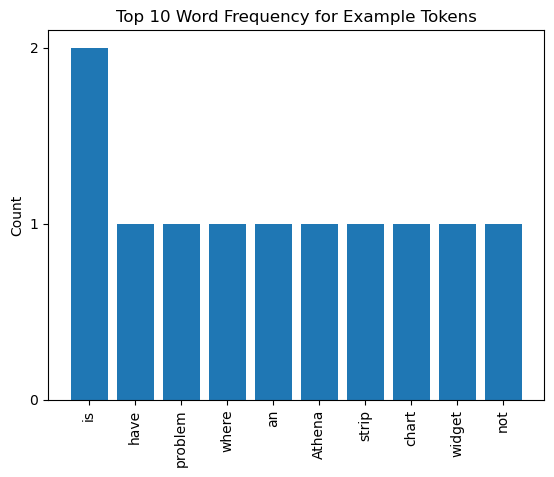

In [22]:
# Run this cell without changes
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

Interpreting the chart above is a bit artificial, since this sample only included 20 tokens. But essentially this is saying that the token with the highest frequency in our example is `"is"`, which occurred twice.

#### Visualizing the Frequency Distribution for the Full Dataset

Let's do that for the full `X_train`.

First, we need a list of all of the words in the `text_tokenized` column. We could do this manually by looping over the rows, but fortunately pandas has a handy method called `.explode()` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html#pandas.Series.explode)) that does exactly this.

Here is an example applying that to the sample dataframe:

In [23]:
# Run this cell without changes
train_sample["text_tokenized"].explode()

1300             ncd
1300             has
1300              an
1300       excellent
1300        document
            ...     
1043    infringement
1043              on
1043           thier
1043            name
1043            sake
Name: text_tokenized, Length: 289, dtype: object

And we can visualize the top 10 words from the sample dataframe like this:

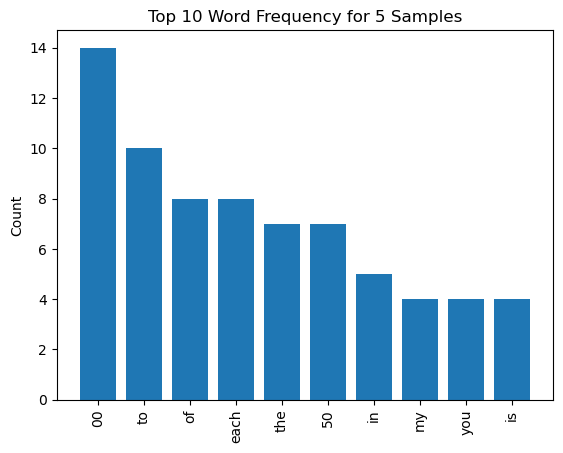

In [24]:
# Run this cell without changes
sample_freq_dist = FreqDist(train_sample["text_tokenized"].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for 5 Samples")

Note that `"00"` and `"50"` are both in the top 10 tokens, due to many prices appearing in the `misc.forsale` example.

In the cell below, complete the same process for the full `X_train`:

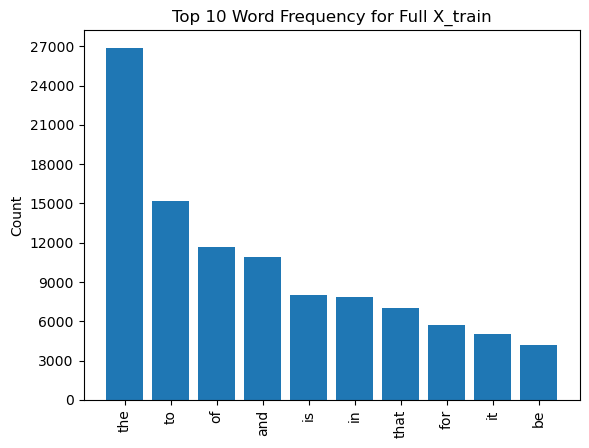

In [25]:
# Create a frequency distribution for X_train
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

# Plot the top 10 tokens
visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

Ok great, we have a general sense of the word frequencies in our dataset!

We can also subdivide this by category, to see if it makes a difference:

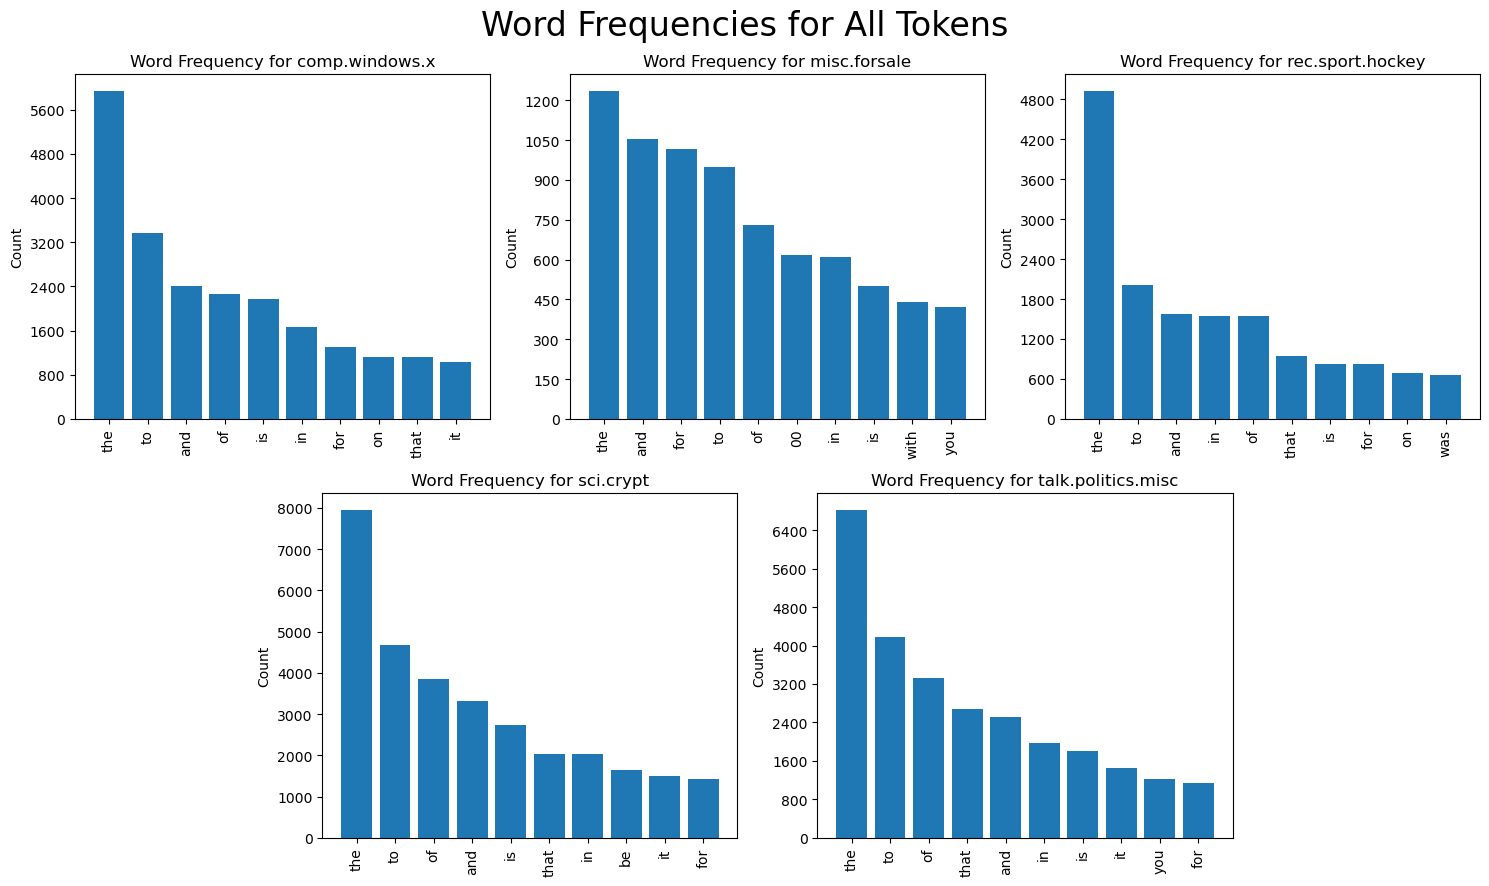

In [26]:
# Run this cell without changes

# Add in labels for filtering (we won't pass them in to the model)
X_train["label"] = [y_train[val] for val in X_train.index]

def setup_five_subplots():
    """
    It's hard to make an odd number of graphs pretty with just nrows
    and ncols, so we make a custom grid. See example for more details:
    https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html

    We want the graphs to look like this:
     [ ] [ ] [ ]
       [ ] [ ]

    So we make a 2x6 grid with 5 graphs arranged on it. 3 in the
    top row, 2 in the second row

      0 1 2 3 4 5
    0|[|]|[|]|[|]|
    1| |[|]|[|]| |
    """
    fig = plt.figure(figsize=(15,9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :2]) # row 0, cols 0-1
    ax2 = fig.add_subplot(gs[0, 2:4])# row 0, cols 2-3
    ax3 = fig.add_subplot(gs[0, 4:]) # row 0, cols 4-5
    ax4 = fig.add_subplot(gs[1, 1:3])# row 1, cols 1-2
    ax5 = fig.add_subplot(gs[1, 3:5])# row 1, cols 3-4
    return fig, [ax1, ax2, ax3, ax4, ax5]

def plot_distribution_of_column_by_category(column, axes, title="Word Frequency for"):
    for index, category in enumerate(newsgroups_train.target_names):
        # Calculate frequency distribution for this subset
        all_words = X_train[X_train["label"] == index][column].explode()
        freq_dist = FreqDist(all_words)
        top_10 = list(zip(*freq_dist.most_common(10)))
        tokens = top_10[0]
        counts = top_10[1]

        # Set up plot
        ax = axes[index]
        ax.bar(tokens, counts)

        # Customize plot appearance
        ax.set_title(f"{title} {category}")
        ax.set_ylabel("Count")
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis="x", rotation=90)


fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("text_tokenized", axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

If these were unlabeled, would you be able to figure out which one matched with which category?

Well, `misc.forsale` still has a number (`"00"`) as one of its top tokens, so you might be able to figure out that one, but it seems very difficult to distinguish the others; every single category has `"the"` as the most common token, and every category except for `misc.forsale` has `"to"` as the second most common token. 

After building our baseline model, we'll use this information to inform our next preprocessing steps.

## 3. Build and Evaluate a Baseline Model with `TfidfVectorizer` and `MultinomialNB`

Let's start modeling by building a model that basically only has access to the information in the plots above. So, using the default token pattern to split the full text into tokens, and using a limited vocabulary.

To give the model a little bit more information with those same features, we'll use a `TfidfVectorizer` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) so that it counts not only the term frequency (`tf`) within a single document, it also includes the inverse document frequency (`idf`) — how rare the term is.

In the cell below, import the vectorizer, instantiate a vectorizer object, and fit it on `X_train["text"]`.

In [27]:
# Import the relevant vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())

,and,for,in,is,it,of,that,the,to,you
0,0.322609,0.077590,0.304553,0.238740,0.203477,0.331334,0.290966,0.278467,0.334292,0.561259
1,0.090518,0.097966,0.096133,0.100479,0.000000,0.092966,0.104965,0.937591,0.253249,0.000000
2,0.173200,0.187451,0.367889,0.192259,0.196634,0.355768,0.401688,0.448504,0.484575,0.000000
3,0.468758,0.000000,0.355598,0.520342,0.152052,0.206330,0.077654,0.462422,0.312257,0.000000
4,0.000000,0.328237,0.322097,0.000000,0.000000,0.000000,0.000000,0.261785,0.848518,0.000000
...,...,...,...,...,...,...,...,...,...,...
2833,0.135376,0.097676,0.095849,0.450819,0.256154,0.370765,0.418620,0.350558,0.505001,0.058880
2834,0.296277,0.192393,0.755176,0.328880,0.000000,0.121716,0.274852,0.306886,0.110522,0.000000
2835,0.489400,0.794502,0.000000,0.000000,0.277808,0.000000,0.000000,0.000000,0.228205,0.000000
2836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Check the shape of your vectorized data:

In [28]:
# Run this cell without changes

# We should still have the same number of rows
assert X_train_vectorized.shape[0] == X_train.shape[0]

# The vectorized version should have 10 columns, since we set
# max_features=10
assert X_train_vectorized.shape[1] == 10

Now that we have preprocessed data, fit and evaluate a multinomial Naive Bayes classifier ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)) using `cross_val_score` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)).

In [29]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.39964789, 0.41725352, 0.3943662 , 0.42151675, 0.37389771])

How well is this model performing? Well, recall the class balance:

In [30]:
# Run this cell without changes
y_train.value_counts(normalize=True)

category
2    0.211416
3    0.209655
0    0.208950
1    0.206131
4    0.163848
Name: proportion, dtype: float64

If we guessed the plurality class every time (class `2`), we would expect about 21% accuracy. So when this model is getting 37-42% accuracy, that is a clear improvement over just guessing. But with an accuracy below 50%, we still expect the model to guess the wrong class the majority of the time. Let's see if we can improve that with more sophisticated preprocessing.

## 4. Iteratively Perform and Evaluate Preprocessing and Feature Engineering Techniques

Now that we have our baseline, the fun part begins. As you've seen throughout this section, preprocessing text data is a bit more challenging that working with more traditional data types because there's no clear-cut answer for exactly what sort of preprocessing we need to do. As we are preprocessing our text data, we need to make some decisions about things such as:

* Do we remove stop words or not?
* What should be counted as a token? Do we stem or lemmatize our text data, or leave the words as is? Do we want to include non-"words" in our tokens?
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?

In this lab, we will work through the first four of these.

### Removing Stopwords

Let's begin with the first question: ***do we remove stopwords or not?*** In general we assume that stopwords do not contain useful information, but that is not always the case. Let's empirically investigate the top word frequencies of each category to see whether removing stopwords helps us to distinguish between the catogories.

As-is, recall that the raw word frequency distributions of 4 out of 5 categories look very similar. They start with `the` as the word with by far the highest frequency, then there is a downward slope of other common words, starting with `to`. The `misc.forsale` category looks a little different, but it still has `the` as the top token.

If we remove stopwords, how does this change the frequency distributions for each category?

#### Stopwords List

Once again, NLTK has a useful tool for this task. You can just import a list of standard stopwords:

In [36]:
# Run this cell without changes
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

We can customize that list as well.

Let's say that we want to keep the word `"for"` in our final vocabulary, since it appears disproportionately often in the `misc.forsale` category. The code below removes that from the stopwords:

In [37]:
# Run this cell without changes
print("Original list length:", len(stopwords_list))
stopwords_list.pop(stopwords_list.index("for"))
print("List length after removing 'for':", len(stopwords_list))

Original list length: 179
List length after removing 'for': 178


In the cell below, write a function `remove_stopwords` that takes in a list-like collection of strings (tokens) and returns only those that are not in the list of stopwords. (Use the `stopwords_list` in the global scope, so that we can later use `.apply` with this function.)

In [38]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

Test it out on one example:

In [42]:
# Run this cell without changes
tokens_example = X_train.iloc[100]["text_tokenized"]
print("Length with stopwords:", len(tokens_example))
assert len(tokens_example) == 110

tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))
assert len(tokens_example_without_stopwords) == 68

Length with stopwords: 110
Length without stopwords: 68


If that ran successfully, go ahead and apply it to the full `X_train`.

In [43]:
# Run this cell without changes
X_train["text_without_stopwords"] = X_train["text_tokenized"].apply(remove_stopwords)

Now we can compare frequency distributions without stopwords:

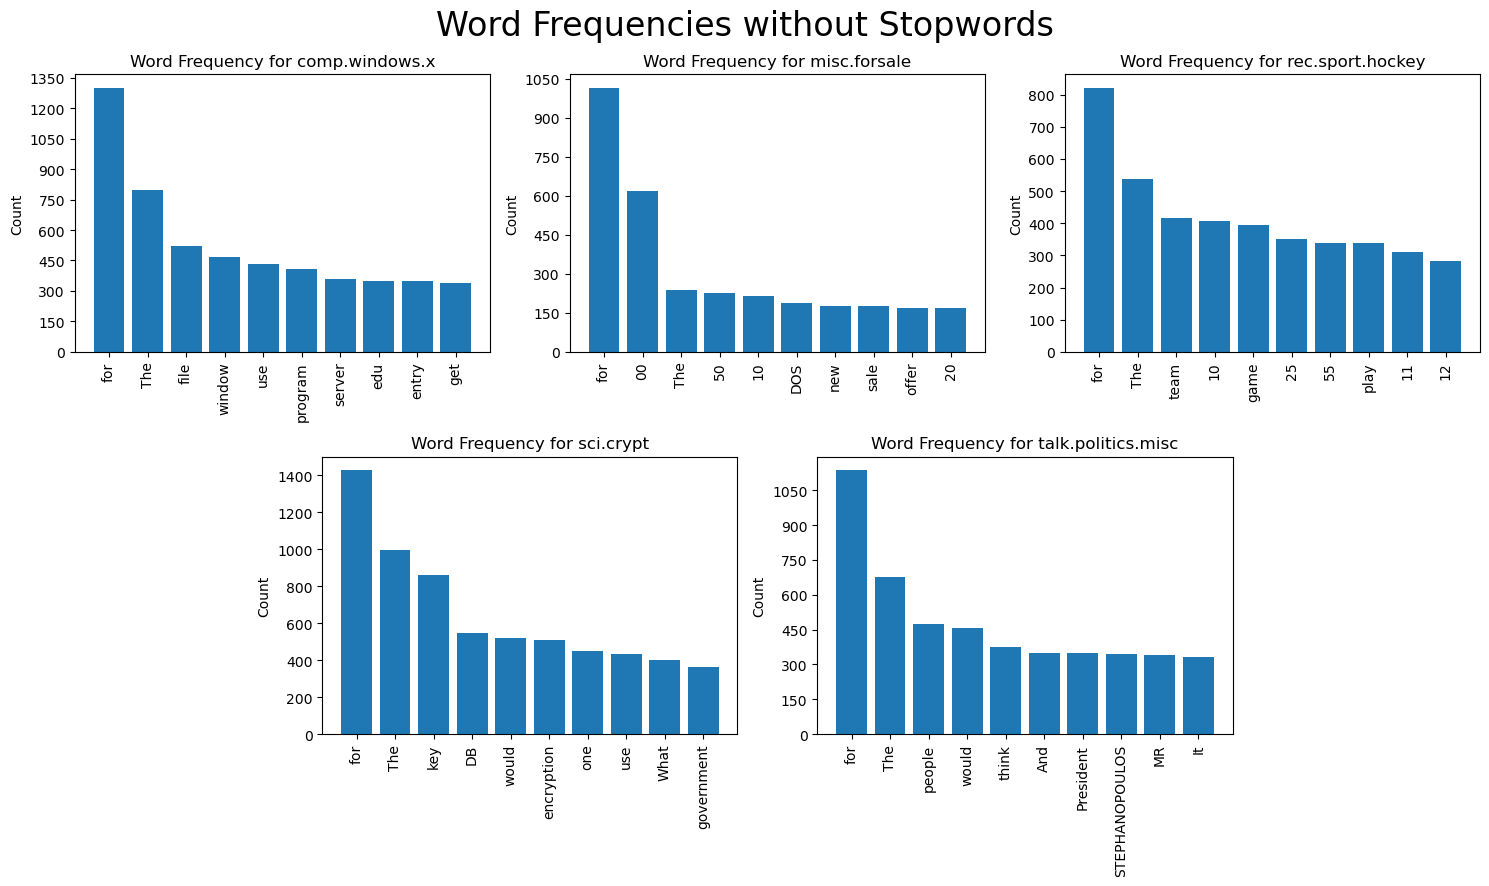

In [44]:
# Run this cell without changes
fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("text_without_stopwords", axes)
fig.suptitle("Word Frequencies without Stopwords", fontsize=24);

Ok, this seems to answer our question. The most common words differ significantly between categories now, meaning that hopefully our model will have an easier time distinguishing between them.

Let's redo our modeling process, using `stopwords_list` when instantiating the vectorizer:

In [45]:
# Run this cell without changes

# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())

,edu,for,get,key,like,new,one,people,use,would
0,0.000000,0.599601,0.000000,0.0,0.000000,0.561043,0.000000,0.570709,0.000000,0.000000
1,0.000000,0.502172,0.864768,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.525951,0.000000,0.850515
4,0.908329,0.418257,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2833,0.000000,0.575451,0.495478,0.0,0.476688,0.000000,0.000000,0.000000,0.000000,0.442862
2834,0.000000,0.867274,0.497831,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2835,0.000000,0.695901,0.000000,0.0,0.000000,0.000000,0.718138,0.000000,0.000000,0.000000
2836,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
# Run this cell without changes

# Evaluate the classifier on X_train_vectorized and y_train
stopwords_removed_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
stopwords_removed_cv

array([0.40669014, 0.42077465, 0.37676056, 0.45502646, 0.42857143])

How does this compare to our baseline?

In [47]:
# Run this cell without changes
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())

Baseline:          0.4013364135429863
Stopwords removed: 0.41756464714211183


Looks like we have a marginal improvement, but still an improvement. So, to answer ***do we remove stopwords or not:*** yes, let's remove stopwords.

### Using Custom Tokens

Our next question is ***what should be counted as a token?***

Recall that currently we are using the default token pattern, which finds words of two or more characters. What happens if we also *stem* those words, so that `swims` and `swimming` would count as the same token?

Here we have provided a custom tokenizing function:

In [49]:
# Run this cell without changes
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

This uses `tokenizer` that we created earlier, as well as a new `stemmer` object. See an example below:

In [50]:
# Run this cell without changes
print("Original sample:", X_train.iloc[100]["text_tokenized"][20:30])
print("Stemmed sample: ", stem_and_tokenize(X_train.iloc[100]["text"])[20:30])

Original sample: ['happening', 'because', 'am', 'not', 'using', 'XtAppMainLoop', 'but', 'am', 'dealing', 'with']
Stemmed sample:  ['happen', 'becaus', 'am', 'not', 'use', 'xtappmainloop', 'but', 'am', 'deal', 'with']


We also need to stem our stopwords:

In [51]:
# Run this cell without changes
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In the cells below, repeat the modeling process from earlier. This time when instantiating the `TfidfVectorizer`, specify:

* `max_features=10` (same as previous)
* `stop_words=stemmed_stopwords` (modified)
* `tokenizer=stem_and_tokenize` (new)

In [52]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())

C:\Users\rbabu\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,file,for,get,key,like,new,one,peopl,use,would
0,0.0,0.501934,0.000000,0.000000,0.400150,0.469658,0.000000,0.476249,0.374901,0.000000
1,0.0,0.524938,0.851140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.556285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830992,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524754,0.000000,0.851254
4,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2833,0.0,0.588738,0.477293,0.000000,0.469351,0.000000,0.000000,0.000000,0.000000,0.453088
2834,0.0,0.879732,0.475469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2835,0.0,0.700743,0.000000,0.000000,0.000000,0.000000,0.713414,0.000000,0.000000,0.000000
2836,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
# Run this cell without changes

# Evaluate the classifier on X_train_vectorized and y_train
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
stemmed_cv

array([0.45246479, 0.44542254, 0.41373239, 0.50440917, 0.46737213])

How does this compare to our previous best modeling process?

In [54]:
# Run this cell without changes
print("Stopwords removed:", stopwords_removed_cv.mean())
print("Stemmed:          ", stemmed_cv.mean())

Stopwords removed: 0.41756464714211183
Stemmed:           0.4566802046848995


Great! Another improvement, a slightly bigger one than we got when just removing stopwords. So, our best modeling process for now is one where we remove stopwords, use the default token pattern, and stem our tokens with a snowball stemmer.

### Domain-Specific Feature Engineering

The way to really get the most information out of text data is by adding features beyond just vectorizing the tokens. This code will be completed for you, and it's okay if you don't fully understand everything that is happening, but we hope it helps you brainstorm for future projects!

#### Number of Sentences

Does the number of sentences in a post differ by category? Let's investigate.

Once again, there is a tool from NLTK that helps with this task.

In [58]:
# Run this cell without changes
from nltk.tokenize import sent_tokenize

sent_tokenize(X_train.iloc[100]["text"])

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\rbabu/nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


We can just take the length of this list to find the number of sentences:

In [57]:
# Run this cell without changes
len(sent_tokenize(X_train.iloc[100]["text"]))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\rbabu/nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\rbabu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


The following code adds a feature `num_sentences` to `X_train`:

In [ ]:
# Run this cell without changes
X_train["num_sentences"] = X_train["text"].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
# Run this cell without changes
fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("num_sentences", axes, "Numbers of Sentences for")
fig.suptitle("Distributions of Sentence Counts by Category", fontsize=24);

Does this seem like a useful feature? Maybe. The distributions differ a bit, but it's hard to know if our model will pick up on this information. Let's go ahead and keep it.

#### Contains a Price

The idea here is particularly to be able to distinguish the `misc.forsale` category, but it might also help with identifying the others. Let's use RegEx to check if the text contains a price:

In [ ]:
# Run this cell without changes

# Define a price as a dollar sign followed by 1-3 numbers,
# optional commas or decimals, 1-2 numbers after the decimal
# (we're not too worried about accidentally matching malformed prices)
price_query = r'\$(?:\d{1,3}[,.]?)+(?:\\d{1,2})?'

X_train["contains_price"] = X_train["text"].str.contains(price_query)

fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("contains_price", axes, "Freqency of Posts Containing Prices for")
fig.suptitle("Distributions of Posts Containing Prices by Category", fontsize=24);

As we expected, the `misc.forsale` category looks pretty different from the others. More than half of those posts contain prices, whereas the overwhelming majority of posts in other categories do not contain prices. Let's include this in our final model.

#### Contains an Emoticon

This is a bit silly, but we were wondering whether different categories feature different numbers of emoticons.

Here we define an emoticon as an ASCII character representing eyes, an optional ASCII character representing a nose, and an ASCII character representing a mouth.

In [ ]:
# Run this cell without changes

emoticon_query = r'(?:[\:;X=B][-^]?[)\]3D([OP/\\|])(?:(?=\s))'

X_train["contains_emoticon"] = X_train["text"].str.contains(emoticon_query)

fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("contains_emoticon", axes, "Freqency of Posts Containing Emoticons for")
fig.suptitle("Distributions of Posts Containing Emoticons by Category", fontsize=24);

Well, that was a lot less definitive. Emoticons are fairly rare across categories. But, there are some small differences so let's go ahead and keep it.

#### Modeling with Vectorized Features + Engineered Features 

Let's combine our best vectorizer with these new features:

In [ ]:
# Run this cell without changes

# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])

# Create a full df of vectorized + engineered features
X_train_vectorized_df = pd.DataFrame(X_train_vectorized.toarray(), columns=tfidf.get_feature_names_out())
preprocessed_X_train = pd.concat([
    X_train_vectorized_df, X_train[["num_sentences", "contains_price", "contains_emoticon"]]
], axis=1)
preprocessed_X_train

In [ ]:
# Run this cell without changes
preprocessed_cv = cross_val_score(baseline_model, preprocessed_X_train, y_train)
preprocessed_cv

In [ ]:
# Run this cell without changes
print("Stemmed:           ", stemmed_cv.mean())
print("Fully preprocessed:", preprocessed_cv.mean())

Ok, another small improvement! We're still a bit below 50% accuracy, but we're getting improvements every time.

### Increasing `max_features`

Right now we are only allowing the model to look at the tf-idf of the top 10 most frequent tokens. If we allow it to look at all possible tokens, that could lead to high dimensionality issues (especially if we have more rows than columns), but there is a lot of room between 10 and `len(X_train)` features:

In [ ]:
# Run this cell without changes
len(X_train)

(In other words, setting `max_features` to 2838 would mean an equal number of rows and columns, something that can cause problems for many model algorithms.)

Let's try increasing `max_features` from 10 to 200:

In [ ]:
# Replace None with appropriate code

# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=None,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["text"])

# Create a full df of vectorized + engineered features
X_train_vectorized_df = pd.DataFrame(X_train_vectorized.toarray(), columns=tfidf.get_feature_names_out())
final_X_train = pd.concat([
    X_train_vectorized_df, X_train[["num_sentences", "contains_price", "contains_emoticon"]]
], axis=1)
final_X_train

In [ ]:
# Run this cell without changes

final_cv = cross_val_score(baseline_model, final_X_train, y_train)
final_cv

Nice! Our model was able to learn a lot more with these added features. Let's say this is our final modeling process and move on to a final evaluation.

## 5. Evaluate a Final Model on the Test Set

Instantiate the model, fit it on the full training set and check the score:

In [ ]:
# Run this cell without changes
final_model = MultinomialNB()

final_model.fit(final_X_train, y_train)
final_model.score(final_X_train, y_train)

Create a vectorized version of `X_test`'s text:

In [ ]:
# Run this cell without changes

# Note that we just transform, don't fit_transform
X_test_vectorized = tfidf.transform(X_test["text"])

Feature engineering for `X_test`:

In [ ]:
# Run this cell without changes
X_test["num_sentences"] = X_test["text"].apply(lambda x: len(sent_tokenize(x)))
X_test["contains_price"] = X_test["text"].str.contains(price_query)
X_test["contains_emoticon"] = X_test["text"].str.contains(emoticon_query)

Putting it all together:

In [ ]:
# Run this cell without changes
X_test_vectorized_df = pd.DataFrame(X_test_vectorized.toarray(), columns=tfidf.get_feature_names_out())
final_X_test = pd.concat([
    X_test_vectorized_df, X_test[["num_sentences", "contains_price", "contains_emoticon"]]
], axis=1)
final_X_test

Scoring on the test set:

In [ ]:
# Run this cell without changes
final_model.score(final_X_test, y_test)

Plotting a confusion matrix:

In [ ]:
# Run this cell without changes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, final_model.predict(final_X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)

Recall that these are the names associated with the labels:

In [ ]:
# Run this cell without changes
target_values_and_names = train_target_counts.drop("count", axis=1)
target_values_and_names

### Interpreting Results

Interpret the results seen above. How well did the model do? How does it compare to random guessing? What can you say about the cases that the model was most likely to mislabel? If this were a project and you were describing next steps, what might those be?

In [ ]:
# Replace None with appropriate text
"""
None
"""

## Summary

In this lab, we used our NLP skills to clean, preprocess, explore, and fit models to text data for classification. This wasn't easy — great job!!